In [1]:
#%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy as sp
import scipy.io as sp_io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import seaborn as sns
from matplotlib.colors import ListedColormap
colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)


## The CNRM-ESM2-1 data

In [2]:
import sys,os
imgdirHisto = "png_Basemap_historical_CNRM-ESM2-1"
imgdir1prct = "png_Basemap_1prctCO2_CNRM-ESM2-1"
imgdirabrupt4Co2 = "png_Basemap_abrupt4xCO2_CNRM-ESM2-1"   

#
imgdirHistoTP = "TP_png_Basemap_historical_CNRM-ESM2-1"
imgdir1prctTP = "TP_png_Basemap_1prctCO2_CNRM-ESM2-1"
imgdirabrupt4Co2TP = "TP_png_Basemap_abrupt4xCO2_CNRM-ESM2-1"

#
imgdirHistoSO = "SO_png_Basemap_historical_CNRM-ESM2-1"
imgdir1prctSO = "SO_png_Basemap_1prctCO2_CNRM-ESM2-1"
imgdirabrupt4Co2SO = "SO_png_Basemap_abrupt4xCO2_CNRM-ESM2-1"

if not os.path.exists(imgdirHisto):
    os.makedirs(imgdirHisto)
if not os.path.exists(imgdir1prct):
    os.makedirs(imgdir1prct)
if not os.path.exists(imgdirabrupt4Co2):
    os.makedirs(imgdirabrupt4Co2)
    
#


if not os.path.exists(imgdirHistoTP):
    os.makedirs(imgdirHistoTP)
if not os.path.exists(imgdir1prctTP):
    os.makedirs(imgdir1prctTP)
if not os.path.exists(imgdirabrupt4Co2TP):
    os.makedirs(imgdirabrupt4Co2TP)

#
if not os.path.exists(imgdirHistoSO):
    os.makedirs(imgdirHistoSO)
if not os.path.exists(imgdir1prctSO):
    os.makedirs(imgdir1prctSO)
if not os.path.exists(imgdirabrupt4Co2SO):
    os.makedirs(imgdirabrupt4Co2SO)

In [3]:
#grid=Dataset('gridInfoIPSL.nc')
#lat = grid['nav_lat'][:]
#lon = grid['nav_lon'][:]
#H = grid['deptho'][:]

In [4]:
CNRM_ESM2_1_Ofx= np.load("/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CNRM-ESM2-1/CNRM-ESM2-1_Ofx_lat_lon_deptho.npz")
lat=CNRM_ESM2_1_Ofx["lat"]
lon=CNRM_ESM2_1_Ofx["lon"]
H = CNRM_ESM2_1_Ofx["deptho"]
H = H[0,:,:,:].max(axis=0)


In [5]:
lat.shape

(294, 362)

In [6]:
lon.shape

(294, 362)

In [7]:
H.shape


(294, 362)

In [8]:
CNRM_ESM2_1_Hist = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CNRM-ESM2-1/CNRM-ESM2-1-Historical-198701-201112-EnsembleMLP.npy')

In [9]:
CNRM_ESM2_1_1pct = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CNRM-ESM2-1/CNRM-ESM2-1-1prctCO2-198701-201112-EnsembleMLP.npy')

In [10]:
CNRM_ESM2_1_abrupt4pct = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CNRM-ESM2-1/CNRM-ESM2-1-abrupt4CO2-198701-201112-EnsembleMLP.npy')

In [11]:
CNRM_ESM2_1_Hist.shape, CNRM_ESM2_1_1pct.shape, CNRM_ESM2_1_abrupt4pct.shape, H.shape

((7, 294, 362), (7, 294, 362), (7, 294, 362), (294, 362))

In [12]:

def makeFig(data, cMin, cMax, cStep, title, ColMap, saveName):
    plt.figure(figsize=(20,12))
    #lons = lon[:,1]
    #lats = lat[1,:]
    #llons, llats = np.roll(lon,100,axis=1),lat
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=-60,resolution='l')
    im1 = m.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=ColMap,latlon=True, extend='both')
    m.drawmapboundary(fill_color='0.9')
    m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[1,1,0,1])
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title(title)
    cb = m.colorbar(im1,"right", size="5%", pad="9%")
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-Sv", "TR", "SO", "NL"])
    #plt.savefig(saveName, format='png', dpi=500, bbox_inches='tight')
    
def makeFigZoomBathymetry(data,cMin, cMax, cStep, title, saveName, label, labelSpot, llcrnrlon=-65, urcrnrlon=-20, llcrnrlat=35, urcrnrlat=65):
    fig = plt.figure(figsize=(8,8))
    map2 = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat, lon_0=-90, projection='merc', resolution='l')
    map2.drawmapboundary(fill_color='0.9')
    map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
    map2.drawcoastlines()
    map2.fillcontinents()
    map2.drawcountries()
    map2.drawparallels(np.arange(-90.,99.,5.),labels=[1,1,0,1], fontsize=15)
    map2.drawmeridians(np.arange(-180.,180.,20.),labels=[1,1,0,1], fontsize=15)
    im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)
   
    plt.title(title, fontsize=20)
    display(plt.gca().get_ylim())
    #cb = map2.colorbar(im2,"right", size="5%", pad="9%")
    cb = map2.colorbar(im2,"right", size="5%", pad="12%")
    cb.ax.tick_params(labelsize=20) 
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-SV", "TR", "SO", "NL"]) 
    
    im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
    #plt.clabel(im2,fontsize=14,fmt='%1.1f', inline=1)
    yL=plt.gca().get_ylim()
    xL=plt.gca().get_xlim()
    plt.text(xL[1]*0.01, yL[1]*0.1, label, fontsize=10, size=10, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})
    plt.text(xL[1]*0.02, yL[1]*0.9, labelSpot, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})

    plt.savefig(saveName, format='png', dpi=100, bbox_inches='tight')


In [14]:
listyears = ["1872","1891","1892","1911","1912","1931","1932","1951","1952","1971","1972","1991","1992","2011"]

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-27-b867c98eb83a>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-27-b867c98eb83a>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-27-b867c98eb83a>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


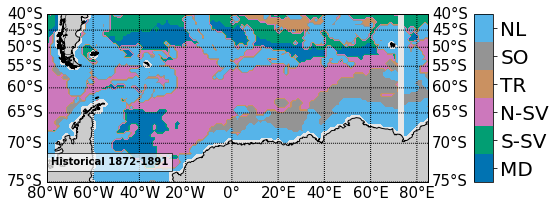

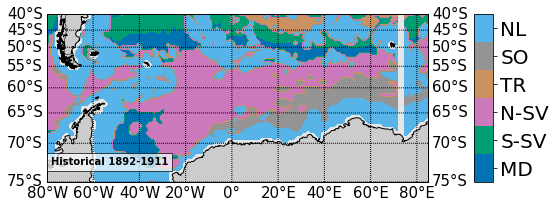

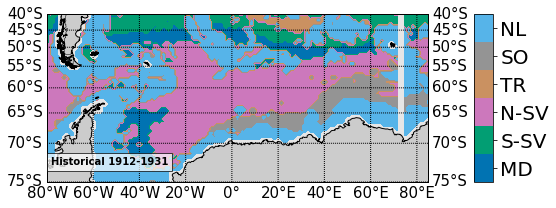

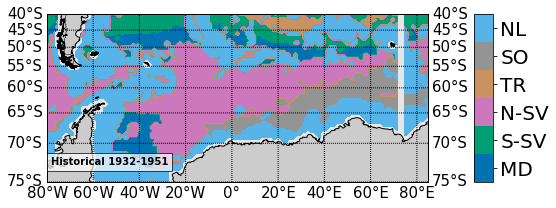

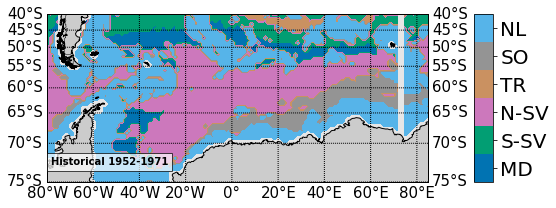

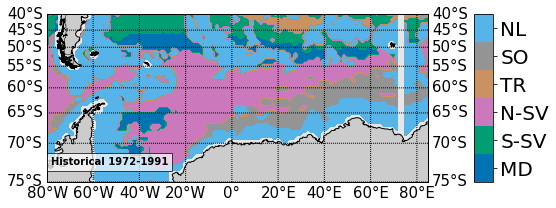

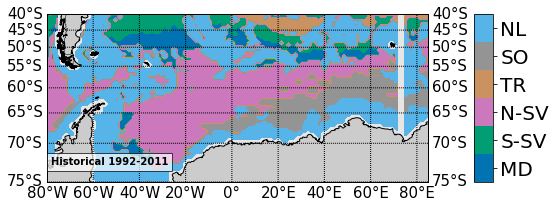

In [28]:
for i in range(7):
    makeFigZoomBathymetry(CNRM_ESM2_1_Hist[i], -1,6,1,'', 'CNRM_ESM2_1_Hist_basemap_hist_'+str(listyears[2*i])+str(listyears[2*i+1])+'.png', str("Historical "+listyears[2*i])+"-"+str(listyears[2*i+1]), '',llcrnrlon=-80, urcrnrlon=85, llcrnrlat=-75, urcrnrlat=-40)
    #plt.savefig('/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_historical_CNRM-ESM2-1/'+str("SO_CNRM_ESM2_1-"+listyears[2*i])+str(listyears[2*i+1])+'.png')

In [15]:
listyears1prct = ["1860","1879","1880","1899","1900","1919","1920","1939","1940","1959","1960","1979","1980","1999"]

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


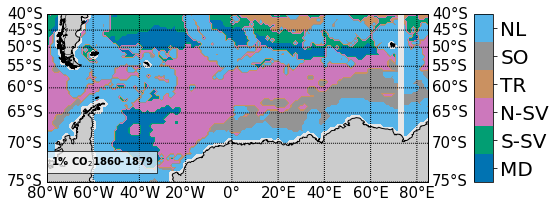

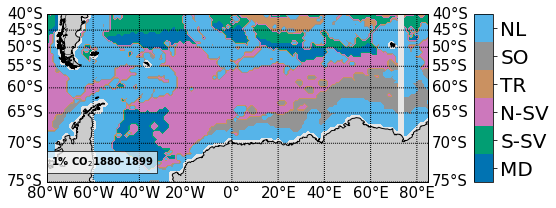

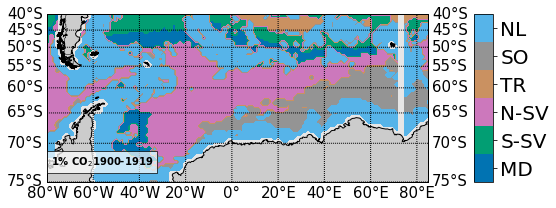

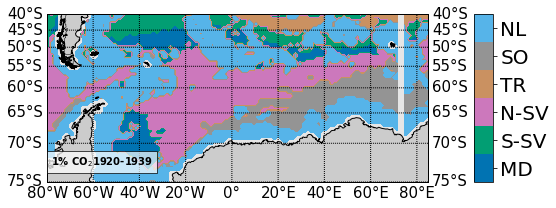

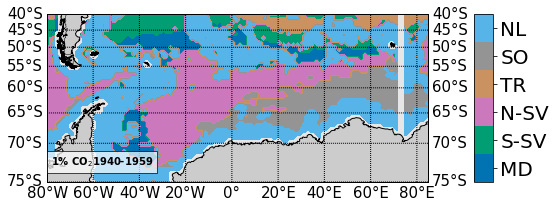

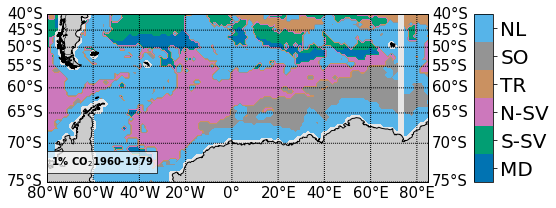

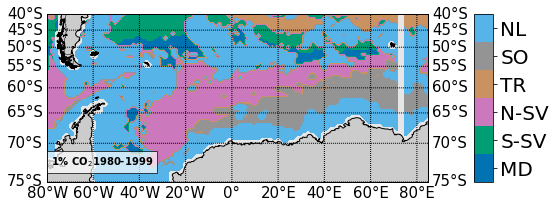

In [20]:
for i in range(7):
    makeFigZoomBathymetry(CNRM_ESM2_1_1pct[i], -1,6,1,'', 'CNRM_ESM2_1_1%CO2_basemap'+str(listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png', str("1% CO$_2$"+listyears1prct[2*i])+"-"+str(listyears1prct[2*i+1]), '',llcrnrlon=-80, urcrnrlon=85, llcrnrlat=-75, urcrnrlat=-40)
    plt.savefig('/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_1prctCO2_CNRM-ESM2-1/'+str("SO_CNRM_ESM2_1-"+listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

<ipython-input-16-6c59e72e6421>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 8057271.0189329805)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-16-6c59e72e6421>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-16-6c59e72e6421>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


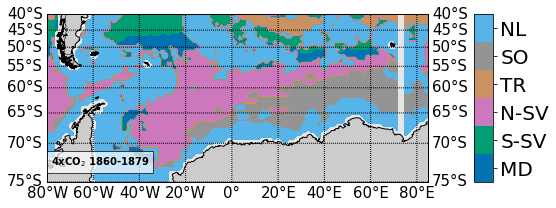

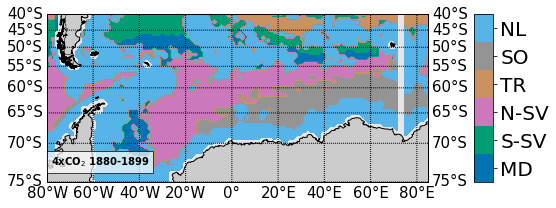

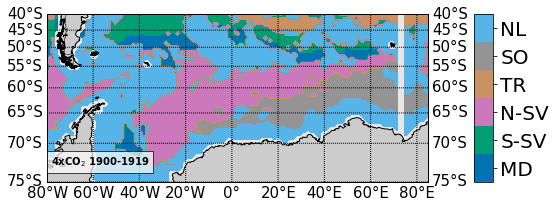

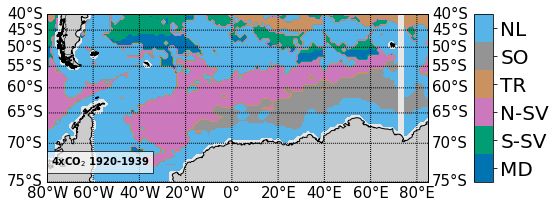

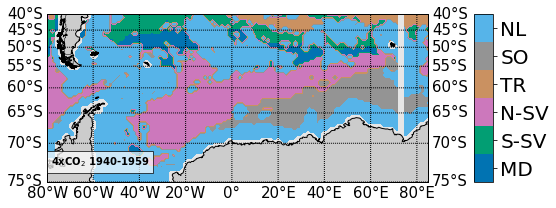

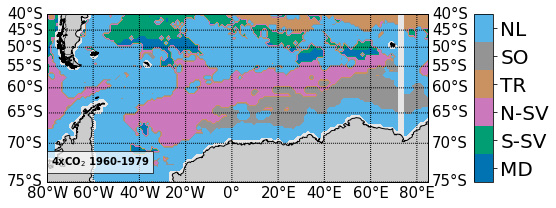

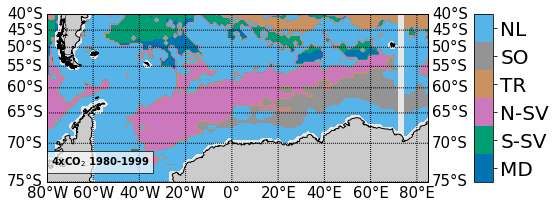

In [22]:
for i in range(7):
    makeFigZoomBathymetry(CNRM_ESM2_1_abrupt4pct[i], -1,6,1,'', 'CNRM_ESM2_1_abrupt4xCO2_basemap'+str(listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png', str("4xCO$_2$ "+listyears1prct[2*i])+"-"+str(listyears1prct[2*i+1]), '',llcrnrlon=-80, urcrnrlon=85, llcrnrlat=-75, urcrnrlat=-40)
    plt.savefig('/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_abrupt4xCO2_CNRM-ESM2-1/'+str("SO_CNRM_ESM2_1-"+listyears1prct[2*i])+str(listyears1prct[2*i+1])+'.png')

In [16]:
natVar1pct=np.zeros(CNRM_ESM2_1_Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar1pct[np.count_nonzero(CNRM_ESM2_1_1pct[4:7] == n, axis = 0)>2]=n

natVar4=np.zeros(CNRM_ESM2_1_Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar4[np.count_nonzero(CNRM_ESM2_1_abrupt4pct[3:7] == n, axis = 0)>2]=n

<ipython-input-12-2158eefdcff8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-12-2158eefdcff8>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-12-2158eefdcff8>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-12-2158eefdcff8>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-12-2158eefdcff8>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))
<ipython-input-12-2158eefdcff8>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,5))


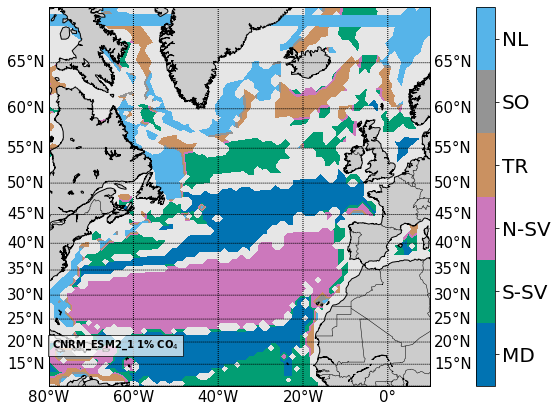

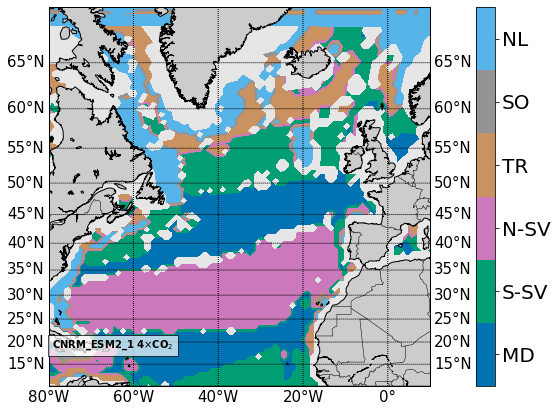

In [18]:
makeFigZoomBathymetry(natVar1pct, -1,6,1,'', 'NA_CNRM_ESM2_1_1%CO2_NAtl_noNatVar_EnsembleMLP_prez.png', r'CNRM_ESM2_1 1% CO$_4$', '', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

makeFigZoomBathymetry(natVar4, -1,6,1,'', 'NA_CNRM_ESM2_1_abrupt4xO2_NAtl_noNatVar_EnsembleMLP_prez.png', r'CNRM_ESM2_1 4$\times$CO$_2$', '', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

## Creating Historical GIF

In [23]:
import os
import imageio

In [23]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/TP_png_Basemap_historical_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('TP_png_Basemap_historical_CNRM-ESM2-1/TP_png_Basemap_Historical_CNRM_ESM2_1.gif', images, fps=1)

In [24]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_historical_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('SO_png_Basemap_historical_CNRM-ESM2-1/SO_png_Basemap_Historical_CNRM_ESM2_1.gif', images, fps=1)

## Creating 1%CO2 GIF

In [24]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/TP_png_Basemap_1prctCO2_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('TP_png_Basemap_1prctCO2_CNRM-ESM2-1/TP_png_Basemap_1prctCO2_CNRM_ESM2_1.gif', images, fps=1)

In [25]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_1prctCO2_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('SO_png_Basemap_1prctCO2_CNRM-ESM2-1/SO_png_Basemap_1prctCO2_CNRM_ESM2_1.gif', images, fps=1)

## Creating abrupt-4xCO2 GIF

In [25]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/TP_png_Basemap_abrupt4xCO2_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('TP_png_Basemap_abrupt4xCO2_CNRM-ESM2-1/TP_png_Basemap_abrupt4prctCO2_CNRM-ESM2-1.gif', images, fps=1)

In [26]:
png_dir = '/home/jovyan/DNN4Cli/figures/CNRM-ESM2-1/SO_png_Basemap_abrupt4xCO2_CNRM-ESM2-1/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('SO_png_Basemap_abrupt4xCO2_CNRM-ESM2-1/SO_png_Basemap_abrupt4prctCO2_CNRM-ESM2-1.gif', images, fps=1)